
## [Note #05 - Model Selection and Model Assessment]



## Import Libraries
* See various conventions and acronyms.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load the data into a DataFrame
* Read directly from a csv (excel-like) data.

In [27]:
FraudDataset = pd.read_csv('fraud.csv')
print(type(FraudDataset))
print(FraudDataset.keys())

<class 'pandas.core.frame.DataFrame'>
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


## Verify basic data statistics
* Count the number of features. (i.e., attributes)
* Count the number of examples. (i.e., instances and labels)
* Unfortunately we don't know what each feature means due to privacy concerns.
* Class variable: 0 (standard) / 1 (fradulent)


In [28]:
def printBasicStats(dataset):
  print('- # of features = %d' % (len(dataset.keys()) - 1))
  print('- # of examples = %d' % len(dataset))
  
printBasicStats(FraudDataset)
print(FraudDataset)

- # of features = 30
- # of examples = 284807
            Time         V1         V2        V3        V4  ...       V26  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155  ... -0.189115   
1            0.0   1.191857   0.266151  0.166480  0.448154  ...  0.125895   
2            1.0  -1.358354  -1.340163  1.773209  0.379780  ... -0.139097   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291  ... -0.221929   
4            2.0  -1.158233   0.877737  1.548718  0.403034  ...  0.502292   
...          ...        ...        ...       ...       ...  ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656  ...  0.250034   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  ... -0.395255   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  ... -0.087371   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799  ...  0.546668   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271  ... -0.818267   

             V27       V28  A

## Data inspection
* See the label imbalance.
* Measure the baseline accuracy.


In [29]:
Counts = FraudDataset['Class'].value_counts()
print(Counts)

0    284315
1       492
Name: Class, dtype: int64


In [30]:
pd.set_option('display.max_columns', 10)
print(FraudDataset.describe(exclude=None))

Counts = FraudDataset['Class'].value_counts()
print(Counts)

BaseLineAcc = Counts[0]/(Counts[0] + Counts[1])
print(BaseLineAcc)


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758743e-12 -8.252298e-13 -9.636929e-13  8.316157e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

       ...           V26           V27           V28         Amount  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   ... -5.615260e-13  3.332112e-12 -3.518886e-12      88.349619   
std    ...  4.822270e-01  4.036325e-01  3.300833e-01     250.12010

## Data inspection Part II.
* Measure the correlation.
* Let's draw heatmap as an intuitive visualization.


            Time            V1            V2            V3            V4  ...  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01  ...   
V1      0.117396  1.000000e+00  3.777386e-12 -2.119585e-12 -1.724017e-13  ...   
V2     -0.010593  3.777386e-12  1.000000e+00  2.326821e-12 -2.314711e-12  ...   
V3     -0.419618 -2.119585e-12  2.326821e-12  1.000000e+00  2.036710e-13  ...   
V4     -0.105260 -1.724017e-13 -2.314711e-12  2.036710e-13  1.000000e+00  ...   
V5      0.173072 -3.472870e-12 -1.832637e-12 -4.031527e-12 -2.549916e-13  ...   
V6     -0.063016 -1.306592e-13  9.439633e-13 -1.582965e-13  1.083580e-12  ...   
V7      0.084714 -1.127393e-13  5.403061e-12  3.404521e-12  8.130086e-13  ...   
V8     -0.036949  2.115132e-12  2.153414e-14 -1.271766e-12  7.338233e-13  ...   
V9     -0.008660  3.081639e-14  3.239499e-13 -6.819934e-13 -7.138427e-13  ...   
V10     0.030617 -2.615209e-12  1.463139e-12 -1.611234e-12 -1.938801e-12  ...   
V11    -0.247689  1.866050e-

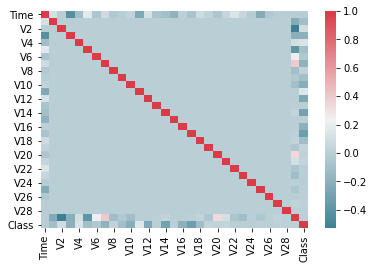

In [6]:
print(FraudDataset.corr())

import seaborn as sns
sns.heatmap(FraudDataset.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Data split
* Must split into train and test data but with respect to the class distribution.


In [41]:
from sklearn.model_selection import StratifiedShuffleSplit

def splitTrainTest(df, size):
  split = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=0)

  # For each pair of train and test indices,
  X = df.drop('Class', axis=1)
  y = df.Class  
  for trainIndexes, testIndexes in split.split(X, y):
    X_train, y_train = X.iloc[trainIndexes], y.iloc[trainIndexes]
    X_test, y_test = X.iloc[testIndexes], y.iloc[testIndexes]

  return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = splitTrainTest(FraudDataset, 0.2)

In [8]:
print(y_train.value_counts())
print(y_test.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


## Logistic Regression 
* Train the logistic regression.
* Train again with normalization.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 

def doLogisticRegression(X, y, normalize=False):
  # If normalize option is enabled,
  if normalize:
    # For each feature (indexed by j as usual)
    for j in X.columns:
      # Subtract its column mean and update the value.
      X[j] -= X[j].mean()

      # Divide by its standard deviation and update the value.
      X[j] /= X[j].std()

  # Instanciate an object from Logistic Regression class.
  lr = LogisticRegression()

  # Perform training and prediction.
  lr.fit(X, y)
  y_pred = lr.predict(X)
      
  # Return training accuracy and confusion matrix.
  return accuracy_score(y, y_pred), confusion_matrix(y, y_pred), lr

TrainAcc, TrainConf, LR = doLogisticRegression(X_train, y_train, normalize=True)
print(TrainAcc)
print(TrainConf)

0.9992143781957032
[[227418     33]
 [   146    248]]


In [43]:
y_test_pred = LR.predict(X_test)
TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
print(TestAcc)
print(TestConf)


0.9979986657771848
[[56848    16]
 [   98     0]]


------------------------------------------------------------
------------------------------------------------------------




## Does anyone figure out what's wrong in here?
* None of the fradulent transactions are predicted correctly?
* We should normalize test data as well.

In [61]:
def normalize(X):
  X_norm = X.copy()
  for j in X_norm.columns:
    # Subtract its column mean and update the value.
    X_norm[j] -= X_norm[j].mean()

    # Divide by its standard deviation and update the value.
    X_norm[j] /= X_norm[j].std()

    return X_norm


(X_train, y_train), (X_test, y_test) = splitTrainTest(FraudDataset, 0.2)
X_test_norm = normalize(X_test)
TrainAcc, TrainConf, LR = doLogisticRegression(X_train, y_train, normalize=True)
y_test_pred = LR.predict(X_test_norm)
TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
print(TestAcc)
print(TestConf)

0.5745760331449036
[[32646 24218]
 [   15    83]]



## Still does not work. The standard protocol.
* Better prediction for true negatives but lots of false positives.
* Now let's normalized consistently based on training data's statistics.

In [62]:
def normalize(X, X_train):
  X_norm = X.copy()
  for j in X_norm.columns:
    # Subtract its column mean and update the value.
    X_norm[j] -= X_train[j].mean()

    # Divide by its standard deviation and update the value.
    X_norm[j] /= X_train[j].std()

    return X_norm

(X_train, y_train), (X_test, y_test) = splitTrainTest(FraudDataset, 0.2)
X_test_norm = normalize(X_test, X_train)
TrainAcc, TrainConf, LR = doLogisticRegression(X_train, y_train, normalize=False)
y_test_pred = LR.predict(X_test_norm)
TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
print(TestAcc)
print(TestConf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.833538148239177
[[47393  9471]
 [   11    87]]


## Ideal case
* If we can access test data in advance, normalize altogether.
* Show the best result.


In [63]:
def normalize(X_train, X_test):
  X = pd.concat([X_train, X_test])  
  for j in X.columns:
    # Subtract its column mean and update the value.
    mean = X[j].mean()
    X_train[j] -= mean
    X_test[j] -= mean

    # Divide by its standard deviation and update the value.
    std = X[j].std()
    X_train[j] /= X_train[j].std()
    X_test[j] /= X_test[j].std()

    return X_train, X_test

(X_train, y_train), (X_test, y_test) = splitTrainTest(FraudDataset, 0.2)
X_train_norm, X_test_norm = normalize(X_train, X_test)
TrainAcc, TrainConf, LR = doLogisticRegression(X_train_norm, y_train, normalize=False)
y_test_pred = LR.predict(X_test_norm)
TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
print(TestAcc)
print(TestConf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9991924440855307
[[56854    10]
 [   36    62]]


# Working with ROC.
- See how we generate a ROC curve.
- See how we compute an Area Under Curve.

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt
def drawPRandRoc(X_train, y_train, X_test, y_test):
  figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
    
  X_train_norm, X_test_norm = normalize(X_train, X_test)
  trainAcc, trainConf, LR = doLogisticRegression(X_train_norm, y_train, normalize=False)
  y_test_pred = LR.predict(X_test_norm)
  y_test_pred_prob = LR.predict_proba(X_test_norm)[:, 1]
       
  # Draw a precision-recall curve.
  precision, recall, thresholds_pr = precision_recall_curve(y_test, y_test_pred_prob)
  avg_pre = average_precision_score(y_test, y_test_pred_prob)
  ax1.plot(precision, recall, label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
  ax1.set_xlabel('Precision', fontsize = 14)
  ax1.set_ylabel('Recall', fontsize = 14)
  ax1.set_title('Precision-Recall Curve', fontsize = 18)
  ax1.legend(loc = 'best')
  
  # Find the default threshold
  close_default = np.argmin(np.abs(thresholds_pr - 0.5))
  ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

  # Draw the roc-curve
  fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_pred_prob)
  roc_auc = auc(fpr,tpr)
  ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
  ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
  ax2.set_xlabel("False Positive Rate", fontsize = 14)
  ax2.set_ylabel("True Positive Rate", fontsize = 14)
  ax2.set_title("ROC Curve", fontsize = 18)
  ax2.legend(loc = 'best')

  # Find the default threshold
  close_default = np.argmin(np.abs(thresholds_roc - 0.5))
  ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


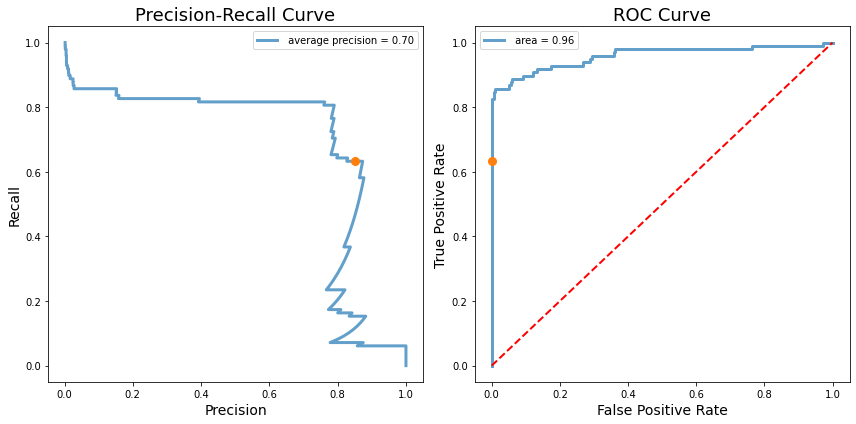

In [65]:
(X_train, y_train), (X_test, y_test) = splitTrainTest(FraudDataset, 0.2)
drawPRandRoc(X_train, y_train, X_test, y_test)